<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains data for football matches, players and teams from several European competition from 2006 - 2016.


### Questions for Analysis
Question 1: How much effect do goalkeepers have on a match outcome?

Question 2: At what age does a goalkeeper start to decline in performance?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# To list the directories we have

import os
os.listdir('./Database_Soccer')

['Match.csv',
 'Player_Attributes.csv',
 'Country.csv',
 'Team_Attributes.csv',
 'sqlite_sequence.csv',
 'Player.csv',
 'Team.csv',
 'League.csv']

In [4]:
tables = os.listdir('./Database_Soccer')

In [5]:
# To prepare for the dataframes with for loop

db_name = 'Database_Soccer'

data = {}
for table in tables:
    name = table.split('.csv')[0].lower()
    data[name] = pd.read_csv(f'{db_name}/{table}')

In [7]:
# To print the datatype of each column of "player" dataframe.

data['player'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [8]:
# To print the datatype of each column of "match" dataframe.

data['match'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [9]:
# To print the datatype of each column of "player_attributes" dataframe.

data['player_attributes'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [10]:
# To see if there's any duplicated rows in "player" dataframe.

sum(data['player'].duplicated())

0

In [11]:
# To see if there's any duplicated rows in "match" dataframe.

sum(data['match'].duplicated())

0

In [12]:
# To see if there's any duplicated rows in "player_attributes" dataframe.

sum(data['player_attributes'].duplicated())

0

In [13]:
# To see if there's any null values in "player" dataframe

sum(data['player'].isnull().any(axis=1))

0

In [14]:
# there are null values in player_attributes. We will pay attention to that in the later steps.

sum(data['player_attributes'].isnull().any(axis=1))

3624

In [15]:
# there are null values of matches. We will pay attention to that in the later steps.

sum(data['match'].isnull().any(axis=1))

24217


### Data Cleaning

 

Since there are some null values from columns that we don't need, I will first gather the useful data and check for null values again in later steps.

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: How much effect do goalkeepers have on a match outcome?

To find the effect goalkeepers have on a match, I would like to see the difference in goal conceded by different qualities of goalkeepers. I can grade the goalkeepers from "F" to "A" based on the ratings from player attributes dataframe.

I will target the season 2015/2016 in the top 5 leagues, ie Premier League, Laliga, Bundesliga, Serie A and Ligue 1

In [16]:
# Build a new dataframe "gk_home_info" by merging "Player" and "Match" dataframes. 
# "home_player_1" refers to the goalkeeper of the home team of the match.

gk_home_info = pd.merge(data['player'], data['match'], left_on = 'player_api_id', right_on = 'home_player_1')

In [17]:
# Useful columns will be the columns of the new dataframe "gk_home_useful_info"

useful_columns = ['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'away_team_goal', 'home_player_1']

In [18]:
gk_home_useful_info = gk_home_info[useful_columns]

In [19]:
gk_home_useful_info.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,away_team_goal,home_player_1
0,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181,19694,19694,2015/2016,38,2016-05-15 00:00:00,2216670,8485,8649,4,528212.0
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2011/2012,21,2012-01-29 00:00:00,1019817,9851,8592,2,189181.0
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,10,2015-10-18 00:00:00,1989875,9851,9831,4,189181.0
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,6,2015-09-18 00:00:00,1989836,9851,8639,1,189181.0
4,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,8,2015-09-26 00:00:00,1989856,9851,10242,1,189181.0


In [20]:
# As we know there are some null values in the "match" dataframe, this is to check if there's any missing values 
# after merging and selecting the useful columns.

sum(gk_home_useful_info.isnull().any(axis=1))

0

In [21]:
# to check for a particular goalkeeper to see if it works

gk_home_useful_info.query('player_api_id == 30859')

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,away_team_goal,home_player_1
17732,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,1,2008-08-17 00:00:00,489051,8455,8462,0,30859.0
17733,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,11,2008-11-01 00:00:00,489151,8455,8472,0,30859.0
17734,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,14,2008-11-22 00:00:00,489181,8455,10261,0,30859.0
17735,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,15,2008-11-30 00:00:00,489191,8455,9825,2,30859.0
17736,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,17,2008-12-14 00:00:00,489211,8455,8654,1,30859.0
17737,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,19,2008-12-26 00:00:00,489232,8455,8659,0,30859.0
17738,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,22,2009-01-17 00:00:00,489262,8455,10194,1,30859.0
17739,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,23,2009-01-28 00:00:00,489272,8455,8549,0,30859.0
17740,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,27,2009-02-28 00:00:00,489312,8455,8528,1,30859.0
17741,30859,Petr Cech,48940,1982-05-20 00:00:00,195.58,198,1729,1729,2008/2009,29,2009-03-15 00:00:00,489332,8455,8456,0,30859.0


In [22]:
# Since we will only focus on the top 5 leagues of season 2015/2016, we will use query method 
# to filter the data we need. those numbers can be found in "league" dataframe.

top5_1516_home_gk = gk_home_useful_info.query('season == "2015/2016" and league_id in [1729, 4769, 7809, 10257, 21518]')

In [23]:
# To reset the index

top5_1516_home_gk = top5_1516_home_gk.reset_index(drop = True)

In [24]:
# to rename the column 'away_team_goal' as 'goal_conceded', as this is the actual meaning.

top5_1516_home_gk = top5_1516_home_gk.rename(columns = {'away_team_goal':'goal_conceded'})

In [25]:
top5_1516_home_gk.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,goal_conceded,home_player_1
0,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,10,2015-10-18 00:00:00,1989875,9851,9831,4,189181.0
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,6,2015-09-18 00:00:00,1989836,9851,8639,1,189181.0
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,8,2015-09-26 00:00:00,1989856,9851,10242,1,189181.0
3,38617,Adam Federici,164853,1985-01-31 00:00:00,187.96,198,1729,1729,2015/2016,12,2015-11-07 00:00:00,1988822,8678,10261,1,38617.0
4,38617,Adam Federici,164853,1985-01-31 00:00:00,187.96,198,1729,1729,2015/2016,14,2015-11-28 00:00:00,1988841,8678,8668,3,38617.0


In [26]:
# "top5_1516_home_gk" is only the home goalkeeper records from the data frame, we will need to build 
# a new dataframe for away goalkeeper records by repeating the above steps.
# Build a new dataframe "gk_away_info" by merging "Player" and "Match" dataframes. 
# "away_player_1" refers to the goalkeeper of the away team of the match.

gk_away_info = pd.merge(data['player'], data['match'], left_on = 'player_api_id', right_on = 'away_player_1')

In [27]:
# Useful columns will be the columns of the new dataframe "gk_away_useful_info"

useful_columns = ['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'home_player_1']

In [28]:
gk_away_useful_info = gk_away_info[useful_columns]

In [29]:
gk_away_useful_info.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,home_player_1
0,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2009/2010,15,2009-11-29 00:00:00,654170,9748,9851,1,26295.0
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,11,2015-10-24 00:00:00,1989883,8689,9851,1,210114.0
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,5,2015-09-13 00:00:00,1989823,9830,9851,0,263511.0
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,7,2015-09-23 00:00:00,1989839,6391,9851,1,311009.0
4,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,9,2015-10-04 00:00:00,1989864,9829,9851,1,115184.0


In [30]:
# Since we will only target at the top 5 leagues of season 2015/2016, we will use query method 
# to filter the data we need

top5_1516_away_gk = gk_away_useful_info.query('season == "2015/2016" and league_id in [1729, 4769, 7809, 10257, 21518]')

In [31]:
# to reset the index

top5_1516_away_gk = top5_1516_away_gk.reset_index(drop = True)

In [32]:
# to rename the column 'home_team_goal' as 'goal_conceded', as this is the actual meaning.

top5_1516_away_gk = top5_1516_away_gk.rename(columns = {'home_team_goal':'goal_conceded'})

In [33]:
top5_1516_away_gk.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,goal_conceded,home_player_1
0,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,11,2015-10-24 00:00:00,1989883,8689,9851,1,210114.0
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,5,2015-09-13 00:00:00,1989823,9830,9851,0,263511.0
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,7,2015-09-23 00:00:00,1989839,6391,9851,1,311009.0
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,9,2015-10-04 00:00:00,1989864,9829,9851,1,115184.0
4,157303,Adam Bogdan,184585,1987-09-27 00:00:00,193.04,198,1729,1729,2015/2016,17,2015-12-20 00:00:00,1988878,9817,8650,3,30455.0


In [34]:
# to combine all home and away goalkeepers performances into one dataframe

top5_1516_gk = top5_1516_home_gk.append(top5_1516_away_gk, ignore_index = True)

In [35]:
# to drop a redundant column 'home_player_1'

top5_1516_gk = top5_1516_gk.drop(['home_player_1'], axis = 1)

In [36]:
top5_1516_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 15 columns):
player_api_id         3652 non-null int64
player_name           3652 non-null object
player_fifa_api_id    3652 non-null int64
birthday              3652 non-null object
height                3652 non-null float64
weight                3652 non-null int64
country_id            3652 non-null int64
league_id             3652 non-null int64
season                3652 non-null object
stage                 3652 non-null int64
date                  3652 non-null object
match_api_id          3652 non-null int64
home_team_api_id      3652 non-null int64
away_team_api_id      3652 non-null int64
goal_conceded         3652 non-null int64
dtypes: float64(1), int64(10), object(4)
memory usage: 428.1+ KB


In [37]:
# To prepare for a new dataframe of goalkeeper's ratings instead of all players' rating

gk_rating = data['player_attributes'].copy()

In [38]:
# To filter goalkeeper related attributes

useless_columns = [0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

In [39]:
gk_rating = gk_rating.drop(gk_rating.columns[useless_columns], axis = 1)

In [40]:
gk_rating.head()

,player_api_id,date,overall_rating,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2016-02-18 00:00:00,67.0,6.0,11.0,10.0,8.0,8.0
1,505942,2015-11-19 00:00:00,67.0,6.0,11.0,10.0,8.0,8.0
2,505942,2015-09-21 00:00:00,62.0,6.0,11.0,10.0,8.0,8.0
3,505942,2015-03-20 00:00:00,61.0,5.0,10.0,9.0,7.0,7.0
4,505942,2007-02-22 00:00:00,61.0,5.0,10.0,9.0,7.0,7.0


In [41]:
# Since the ratings are updated every year, this is to take the latest updated version of the goalkeepers' ratings,
# ie season 2015/2016

gk_rating_1516 = gk_rating.sort_values('date', ascending = False).drop_duplicates('player_api_id').reset_index(drop = True)

In [42]:
gk_rating_1516.head()

,player_api_id,date,overall_rating,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,307224,2016-07-07 00:00:00,64.0,12.0,12.0,7.0,11.0,12.0
1,184521,2016-07-07 00:00:00,73.0,11.0,15.0,15.0,12.0,7.0
2,512726,2016-07-07 00:00:00,63.0,11.0,12.0,12.0,12.0,7.0
3,450002,2016-07-07 00:00:00,74.0,15.0,11.0,11.0,10.0,11.0
4,45400,2016-07-07 00:00:00,68.0,13.0,11.0,6.0,9.0,14.0


In [43]:
# To grade all players goalkeeping ability from grade "F" to "A"

bin_edges = [0, 65, 70, 75, 80, 85, 100]
bin_names = ['F','E','D','C','B','A']

In [44]:
gk_rating_1516['gk_tier'] = pd.cut(gk_rating_1516['overall_rating'], bin_edges, labels = bin_names)

In [45]:
# I'd like to explore a uni-variate analysis with the distribution of goalkeeper tier.

gk_rating_1516['gk_tier'].value_counts()

F    3996
E    3307
D    2441
C    1043
B     232
A      39
Name: gk_tier, dtype: int64

In [49]:
# To merge the goalkeeper ratings with the competition outcomes of top 5 league in season 2015/2016

top5_1516_gk_final = pd.merge(top5_1516_gk, gk_rating_1516, on = 'player_api_id')

In [50]:
top5_1516_gk_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3652 entries, 0 to 3651
Data columns (total 23 columns):
player_api_id         3652 non-null int64
player_name           3652 non-null object
player_fifa_api_id    3652 non-null int64
birthday              3652 non-null object
height                3652 non-null float64
weight                3652 non-null int64
country_id            3652 non-null int64
league_id             3652 non-null int64
season                3652 non-null object
stage                 3652 non-null int64
date_x                3652 non-null object
match_api_id          3652 non-null int64
home_team_api_id      3652 non-null int64
away_team_api_id      3652 non-null int64
goal_conceded         3652 non-null int64
date_y                3652 non-null object
overall_rating        3652 non-null float64
gk_diving             3652 non-null float64
gk_handling           3652 non-null float64
gk_kicking            3652 non-null float64
gk_positioning        3652 non-null fl

In [51]:
# After merging the player attributes with real match outcomes, there are no null values in the useful data we need

sum(top5_1516_gk_final.isnull().any(axis = 1))

0

In [97]:
# Define a function to plot similar bar charts

def plot_bar(df, title, xlabel, ylabel):
    bx = df.plot(kind = 'bar', title = title, rot = 0)
    bx.set_xlabel(xlabel)
    bx.set_ylabel(ylabel)

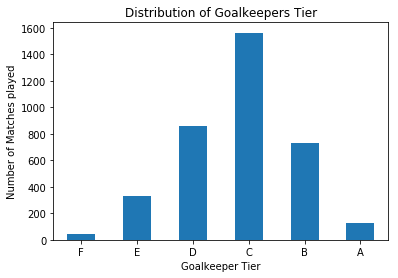

In [107]:
# uni-variate analysis with plot_bar function to understand the distribution of goalkeepers qualities.

plot_bar(top5_1516_gk_final['gk_tier'].value_counts().sort_index(), 'Distribution of Goalkeepers Tier', 'Goalkeeper Tier', 'Number of Matches played')

In [99]:
# to understand the distribution of goalkeepers qualities with numeric and accurate view.

top5_1516_gk_final['gk_tier'].value_counts().describe()

count       6.000000
mean      608.666667
std       569.358469
min        42.000000
25%       177.000000
50%       531.000000
75%       826.500000
max      1564.000000
Name: gk_tier, dtype: float64

In [52]:
# Since the games played by each tier of goalkeepers are not the same, we need to take the proportion by dividing goals_conceded/games_played

games_played = top5_1516_gk_final.groupby(['gk_tier']).count()['height']
games_played

gk_tier
F      42
E     333
D     859
C    1564
B     729
A     125
Name: height, dtype: int64

In [53]:
goals_conceded = top5_1516_gk_final.groupby(['gk_tier']).sum()['goal_conceded']
goals_conceded

gk_tier
F      78
E     546
D    1242
C    2157
B     739
A     112
Name: goal_conceded, dtype: int64

In [54]:
proportion = goals_conceded / games_played
proportion

gk_tier
F    1.857143
E    1.639640
D    1.445867
C    1.379156
B    1.013717
A    0.896000
dtype: float64

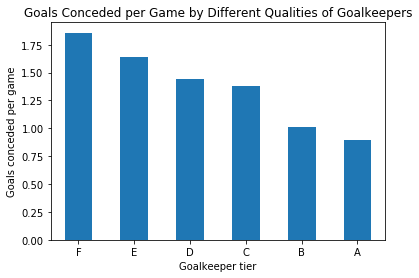

In [55]:
# to explore bi-variate analysis with plot_bar function. To see the relationship between goals conceded and 
# goalkeepers ability

plot_bar(proportion, 'Goals Conceded per Game by Different Qualities of Goalkeepers', 'Goalkeeper tier', 'Goals conceded per game')

In [56]:
# to understand the distribution of goals conceded by different qualities of goalkeepers with numeric 
# and accurate view.

proportion.describe()

count    6.000000
mean     1.371921
std      0.365361
min      0.896000
25%      1.105077
50%      1.412512
75%      1.591197
max      1.857143
dtype: float64

### Question 2: At what age does a goalkeeper start to decline in performance?

To see at what age a goalkeeper starts to decline, I would like to check the goals conceded at each year of age. To do that I'd need to build a new dataframe with new columns like "age", and also handle the datatype of some columns like "season".

In [57]:
# To create a new dataframe by merging on "player" and "match" dataframes. "home_player_1" refers to the goalkeeper
# of home teams.

home_gk_record = pd.merge(data['player'], data['match'], left_on = 'player_api_id', right_on = 'home_player_1')

In [58]:
# To filter the useful columns only

useful_columns = ['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'away_team_goal']

In [59]:
home_gk_record = home_gk_record[useful_columns]
home_gk_record.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,away_team_goal
0,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181,19694,19694,2015/2016,38,2016-05-15 00:00:00,2216670,8485,8649,4
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2011/2012,21,2012-01-29 00:00:00,1019817,9851,8592,2
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,10,2015-10-18 00:00:00,1989875,9851,9831,4
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,6,2015-09-18 00:00:00,1989836,9851,8639,1
4,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,8,2015-09-26 00:00:00,1989856,9851,10242,1


In [60]:
# "home_gk_record" is a dataframe referring to the home team goalkeepers only. "away_gk_record" will be a new 
# dataframe for away teams' goalkeepers, and "away_player_1" refers to the goalkeepers of away teams.

away_gk_record = pd.merge(data['player'], data['match'], left_on = 'player_api_id', right_on = 'away_player_1')

In [61]:
# To filter the useful columns only

useful_columns = ['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal']

In [62]:
away_gk_record = away_gk_record[useful_columns]
away_gk_record.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal
0,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2009/2010,15,2009-11-29 00:00:00,654170,9748,9851,1
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,11,2015-10-24 00:00:00,1989883,8689,9851,1
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,5,2015-09-13 00:00:00,1989823,9830,9851,0
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,7,2015-09-23 00:00:00,1989839,6391,9851,1
4,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,9,2015-10-04 00:00:00,1989864,9829,9851,1


In [63]:
# to rename the "away_team_goal" column as "goal_conceded"

home_gk_record = home_gk_record.rename(columns = {'away_team_goal':'goal_conceded'})

In [64]:
# to rename the "home_team_goal" column as "goal_conceded"

away_gk_record = away_gk_record.rename(columns = {'home_team_goal':'goal_conceded'})

In [65]:
# this is to combine both home and away goalkeepers records together

all_gk_record = home_gk_record.append(away_gk_record, ignore_index = True)

In [66]:
all_gk_record.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,goal_conceded
0,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181,19694,19694,2015/2016,38,2016-05-15 00:00:00,2216670,8485,8649,4
1,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2011/2012,21,2012-01-29 00:00:00,1019817,9851,8592,2
2,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,10,2015-10-18 00:00:00,1989875,9851,9831,4
3,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,6,2015-09-18 00:00:00,1989836,9851,8639,1
4,189181,Abdoulaye Diallo,197233,1992-03-30 00:00:00,187.96,174,4769,4769,2015/2016,8,2015-09-26 00:00:00,1989856,9851,10242,1


In [67]:
# this is to change the datatype of 'birthday' to a datetime object

all_gk_record['birthday'] = pd.to_datetime(all_gk_record['birthday'])

In [68]:
all_gk_record['birthday']

0       1993-02-19
1       1992-03-30
2       1992-03-30
3       1992-03-30
4       1992-03-30
           ...    
49495   1986-07-09
49496   1986-07-09
49497   1986-07-09
49498   1986-07-09
49499   1986-07-09
Name: birthday, Length: 49500, dtype: datetime64[ns]

In [69]:
# This is to change the season column into "yyyy-mm-dd hh-mm--ss" format, so we could subtract later.

all_gk_record['season'] = all_gk_record['season'].apply(lambda x: pd.to_datetime(x.split('/')[1] + '-05-31 00:00:00'))

In [70]:
all_gk_record['season']

0       2016-05-31
1       2012-05-31
2       2016-05-31
3       2016-05-31
4       2016-05-31
           ...    
49495   2015-05-31
49496   2015-05-31
49497   2015-05-31
49498   2016-05-31
49499   2016-05-31
Name: season, Length: 49500, dtype: datetime64[ns]

In [71]:
all_gk_record['age'] = all_gk_record['season'] - all_gk_record['birthday']

In [72]:
all_gk_record['age'] = all_gk_record['age']/np.timedelta64(1, 'Y')

In [73]:
all_gk_record['age'] = all_gk_record['age'].round(0)

In [74]:
all_gk_record['age'].value_counts()

29.0    4111
27.0    3994
31.0    3974
28.0    3885
30.0    3749
26.0    3695
32.0    3396
25.0    3124
24.0    3122
33.0    2738
23.0    2370
34.0    2300
22.0    1675
35.0    1581
36.0    1369
21.0     914
37.0     835
38.0     747
39.0     521
20.0     452
40.0     289
19.0     220
41.0     194
42.0      86
43.0      58
17.0      56
18.0      45
Name: age, dtype: int64

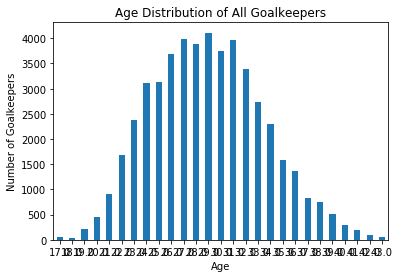

In [75]:
# uni-variate analysis with plot_bar function to understand the distribution of goalkeepers' age.

plot_bar(all_gk_record['age'].value_counts().sort_index(), 'Age Distribution of All Goalkeepers', 'Age', 'Number of Goalkeepers')

In [76]:
# to understand the distribution of goalkeepers age with numeric and accurate view.
all_gk_record['age'].value_counts().describe()

count      27.000000
mean     1833.333333
std      1519.996255
min        45.000000
25%       370.500000
50%      1581.000000
75%      3260.000000
max      4111.000000
Name: age, dtype: float64

In [77]:
all_gk_record.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,goal_conceded,age
0,528212,Aaron Lennox,206592,1993-02-19,190.50,181,19694,19694,2016-05-31,38,2016-05-15 00:00:00,2216670,8485,8649,4,23.0
1,189181,Abdoulaye Diallo,197233,1992-03-30,187.96,174,4769,4769,2012-05-31,21,2012-01-29 00:00:00,1019817,9851,8592,2,20.0
2,189181,Abdoulaye Diallo,197233,1992-03-30,187.96,174,4769,4769,2016-05-31,10,2015-10-18 00:00:00,1989875,9851,9831,4,24.0
3,189181,Abdoulaye Diallo,197233,1992-03-30,187.96,174,4769,4769,2016-05-31,6,2015-09-18 00:00:00,1989836,9851,8639,1,24.0
4,189181,Abdoulaye Diallo,197233,1992-03-30,187.96,174,4769,4769,2016-05-31,8,2015-09-26 00:00:00,1989856,9851,10242,1,24.0


In [78]:
# to find out the goals conceded by goalkeepers in each year of age, we would need to use groupby to find the related
# data. We will also need to divide the goals conceded by the number of games they have played to find out the 
# proportions.

games_by_one_gk = all_gk_record.groupby(['player_name','age']).count()['goal_conceded']
games_by_one_gk

player_name       age 
Aaron Lennox      23.0     1
Abdoulaye Diallo  18.0     1
                  20.0     1
                  24.0     7
Achille Coser     30.0     2
                          ..
Zeljko Brkic      27.0    31
                  28.0    12
                  29.0    21
                  30.0     3
Zeljko Kalac      36.0     1
Name: goal_conceded, Length: 2906, dtype: int64

In [79]:
goals_conceded_1 = all_gk_record.groupby(['player_name','age']).sum()['goal_conceded']
goals_conceded_1

player_name       age 
Aaron Lennox      23.0     4
Abdoulaye Diallo  18.0     1
                  20.0     2
                  24.0     9
Achille Coser     30.0     2
                          ..
Zeljko Brkic      27.0    36
                  28.0    22
                  29.0    34
                  30.0    12
Zeljko Kalac      36.0     1
Name: goal_conceded, Length: 2906, dtype: int64

In [80]:
proportion_1 = goals_conceded_1 / games_by_one_gk

In [81]:
# to make proportion_1 a dataframe instead of series.
pro1 = proportion_1.unstack()

In [82]:
# to see if pro1 display the correct dataframe

pro1.head()

age,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Lennox,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdoulaye Diallo,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.285714,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Achille Coser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Bogdan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Collin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


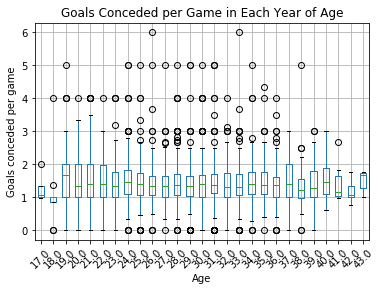

In [84]:
ax = plt.subplot()
ax.set_xlabel('Age')
ax.set_ylabel('Goals conceded per game')
ax.set_title('Goals Conceded per Game in Each Year of Age')
pro1.boxplot(ax = ax, rot = 45)

## Conclusions

### Question 1: How much effect do goalkeepers have on a match outcome?

We realised that goalkeepers do have a significant impact on the outcome of a football match, given football matches are competitions decided by a relatively small amounts of goals. A goal could completely change the outcome of a match.

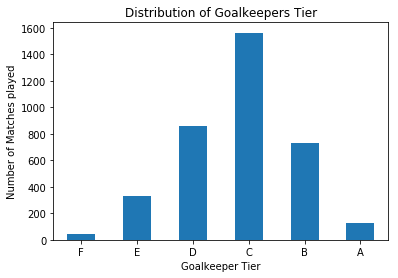

In [123]:
plot_bar(top5_1516_gk_final['gk_tier'].value_counts().sort_index(), 'Distribution of Goalkeepers Tier', 'Goalkeeper Tier', 'Number of Matches played')

In [111]:
top5_1516_gk_final['gk_tier'].value_counts().describe()

count       6.000000
mean      608.666667
std       569.358469
min        42.000000
25%       177.000000
50%       531.000000
75%       826.500000
max      1564.000000
Name: gk_tier, dtype: float64

As shown in the above distribution diagram, we can see that top quality goalkeepers are very rare. There are only 125 matches played by A-tier goalkeepers in the dataset, which is 3.42% of all matches.

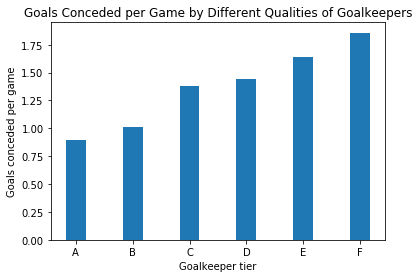

In [88]:
plt.bar(['F','E','D','C','B','A'], proportion, 0.35)
plt.xlabel('Goalkeeper tier')
plt.ylabel('Goals conceded per game')
plt.title('Goals Conceded per Game by Different Qualities of Goalkeepers');

From the diagram, we can see that goals conceded per game by better goalkeepers are significantly lower than normal or bad goalkeepers. For example, tier A goalkeepers concede less than 0.90 goal, while tier C and F goalkeepers concede 1.40 and 1.86 goals, which are 55% and 106% more. Even in the top 5 leagues, which are very competitive, the difference is so big that it could totally change the outcome of the match.

However there are certain limitations on this investigation. Number of goals conceded should definitely not be only considered by the quality of goalkeepers. The quality of shots taken, the position of shots taken, the position of defenders or even weather and pitch quality could have their impact on the shot outcomes. We were not able to do that due to the limitations of the dataset. 

For future investigation, firstly I would focus on the data of shots saved vs goals conceded, hence the actual points the goalkeepers gained for the team. The above factors like quality and position of shots taken should also be considered. 


### Question 2: At what age does a goalkeeper start to decline in performance?

As football enthusiasts, we always find it interesting that many goalkeepers of big teams are indeed in their late career stage. They are 30 something years old, and we might think they should have declined a lot in performance. However, the outcome is the opposite.

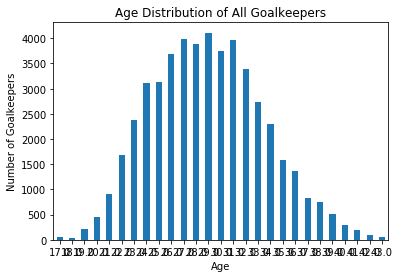

In [89]:
plot_bar(all_gk_record['age'].value_counts().sort_index(), 'Age Distribution of All Goalkeepers', 'Age', 'Number of Goalkeepers');

In [109]:
all_gk_record['age'].value_counts().describe()

count      27.000000
mean     1833.333333
std      1519.996255
min        45.000000
25%       370.500000
50%      1581.000000
75%      3260.000000
max      4111.000000
Name: age, dtype: float64

From the above diagram, we can see that most of the goalkeepers range from 24 to 33 years old. For future investigation, I'd like to compare the age distribution of goalkeepers and that of other outfield players.

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


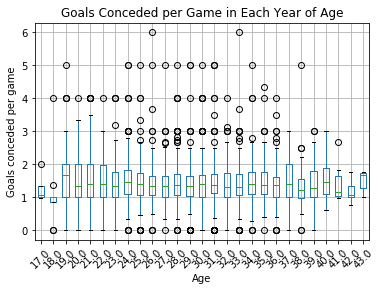

In [90]:
ax = plt.subplot()
ax.set_xlabel('Age')
ax.set_ylabel('Goals conceded per game')
ax.set_title('Goals Conceded per Game in Each Year of Age')
pro1.boxplot(ax = ax, rot = 45);

Based on the box diagram, we can see that age does not have a significant impact on goalkeepers' ability. The difference in goals conceded is so small that the standard deviation is only 0.126. 

Of course again there are many other factors that have their impacts on shots taken. For example the quality of shots taken, the position of shots taken, the position of defenders or even weather and pitch quality could have their impacts on the shot outcomes. But the dataframe this time is taken from 2006 - 2016 with more than top 5 leagues. The large sample is sufficient to tell us that age does not affect goalkeepers’ ability.

For future investigation, I would remove data that is out of our research scope. For example, players with less than 5 appearances in one season.

